<h1> ch5 순환 신경망(RNN) </h1>

<p>
    흐림이 단방향인 신경망을 피드포워드라고 말한다. 피드포워드 신경망은 구성이 단순하다. 많은 문제에 응용할 수 있다. 하지만 시계열 데이터를 잘 다루지 못한다. 정확히 단순한 피드포워드 신경망에서 시계열 데이터의 성질을 충분히 학습할 수 없다. 순환 신경망(RNN)은 피드포워드 신경망의 문제점을 훌륭하게 해결해준다.
</p>

<h2> 5.1 확률과 언어 모델 </h2>

<h3> 5.1.1 word2vec을 확률 관점에서 바라보다 </h3>

<p> 
    word2vec의 CBOW 모델에서 $ w_1, w_2, \cdots, w_t $ 라는 단어열로 표현되는 말뭉치가 있다고 가정한다. 그리고 t번째 단어를 '타깃', 그 전후 단어 ( t-1 번, t+1 번)을 '맥락'으로 취급한다. CBOW 모델은 $w_{t-1}$과 $w_{t+1}$로부터 타깃 $w_{t}$ 를 추측하는 일을 수행한다. $w_{t-1}$과 $w_{t+1}$이 주어졌을 경우 $w_{t}$가 될 확률을 나타낸다.
    $$
        P(w_t | w_{t-1}, w_{t+1})
    $$
    CBOW 모델은 $w_{t-1}$과 $w_{t+1}$이 주어졌을 때 $w_{t}$가 일어날 확률을 모델링한다. 윈도우 크기가 1일 경우이다. 지금까지는 전후, 좌우 대칭으로 맥락을 생각했다. 이번에는 왼쪽 윈도우만 한정한다. 왼쪽 두 단어만을 맥락으로 확률을 나타낸다
    $$
        P(w_t | w_{t-2}, w_{t-1})
    $$
    이 확률로 CBOW 모델의 손실 함수를 교차 엔트로피 오차에 의해 유도할 수 있다. 
    $$
        L = - logP(w_t | w_{t-2}. w_{t-1})
    $$
    CBOW 모델의 학습으로 손실 함수를 최소화하는 가중치 매개변수를 찾고, 가중치 매개변수가 발견되면 CBOW 모델은 맥락으로부터 타깃을 더 정확하게 추측할 수 있다. CBOW 모델을 학습시키는 목적은 맥락으로부터 타깃을 정확하게 추측하는 것이다. 학습을 진행하면 단어의 의미가 인코딩된 '단어의 분산 표현'을 얻는다. 
</p>

<h3> 5.1.2 언어 모델 </h3>

<p>
    언어 모델은 단어 나열에 확률을 부여한다. 특정한 단어의 시퀀스가 일어날 가능성이 어느 정도인지 확률로 평가한다. 언어 모델은 다양하게 응용할 수 있다. 기계 번역과 음성 인식이 대표적인 예이다. 음성 인식의 경우, 사람의 음성으로부터 몇개의 문장을 후보로 생성하고, 언어 모델을 사용하여 문장으로써 자연스러운지 기준을 순서로 매길 수 있다. 언어 모델은 새로운 문장을 생성하는 용도로도 이용할 수 있다. 언어 모델은 단어 순서의 자연스러움을 확률적으로 평가하기 때문이다. 그 확률분포에 따라 다음으로 적합한 단어를 샘플링할 수 있다. 
</p>
<p>
    언어 모델을 수식으로 설명한다. $w_1, \cdots, w_m$ 이라는 m개 단어로 된 문장. 이 때 단어가 $w_1, \cdots, w_m$ 이 순서로 출현할 확률을 $ P(w_1, \cdots, w_m) $. 이 확률은 동시에 일어날 확률이므로 동시 확률. $P(w_1, \cdots, w_m)$은 사후 확률을 사용하여 분햏하여 쓸 수 있다
    $$
        P(w_1, \cdots, w_m) = P(w_m|w_1, \cdots, w_{m-1}) \times P(w_{m-1}|w_1, \cdots, w_{m-1}) \
                                \times \cdots \times P(w_3|,w_1, w_2) \times P(w_2| w_1) \times \
                                P(w_1) \\
                            = \prod_{t=1}^{m} P(w_t| w_1,\cdots, w_{t-1})
    $$
    동시 확률은 사후 확률의 총곱으로 나타낼수 있다. 위 결과는 확률의 곱셈정리로부터 유도할 수 있다. 확률의 곱셈정리는 다음 식으로 표현된다.
    $$
        P(A, B) = P(A|B)P(B) 
    $$
    위 식의 의미는 'A와 B가 모두 일어날 확률 P(A, B)'는 'B가 일어날 확률 P(B)'와 'B가 일어난 후 A가 일어날 확률 P(A|B)'를 곱한 값과 같다. 이 곱셈정리를 사용하면 m개 단어의 동시 확률 $P(w_1, \cdots, w_m)$을 사후 확률로 나타낼 수 있다. 
    $$
        P(\underbrace{w_1, \cdots, w_{m-1}}_{A}, w_m) = P(A, w_m) = P(w_m|A)P(A) \\
        P(A) = P(\underbrace{w_1, \cdots, w_{m-2}}_{A'}, w_{m-1}) = P(A', w_{m-1}) = \
                                                        P(w_{m-1}|A')P(A')
    $$
    단어의 동시 확률을 차례로 하나씩 줄여가면서 매번 사후 확률로 분해한다.
</p>

<h3> 5.1.3 CBOW 모델을 언어 모델로? </h3>

<p>
    word2vec의 CBOW 모델을 언어 모델에 적용하기 위해 맥락의 크기를 특정 값으로 한정하여 근사적으로 표현할 수 있다. 
    $$
        P(w_1, \cdots, w_m) \prod_{t=1}^m P(w_t|w_1, \cdots, w_{t-1}) \approx \prod_{t=1}^m P(w_t|w_{t-2}, w_{t-1})
    $$
    여기서는 맥락을 왼쪽 2개의 단어로 한정한다. CBOW 모델에 따라 근사적으로 나타난다. 물론 맥락의 크기는 임의로 설정할 수 있다. 하지만, 결국 특정 길이로 '고정'된다. 예를 들어, <br />
    'Tom was watching TV in his room. Mary came into the room. Mary said hi to [?]' <br />
    예문있다고 가정한다. [?]로부터 18번째 앞에서 나오는 "Tom"을 기억해야 [?]를 추측할 수 있다. 하지만 맥락의 크기가 10이면 Tom을 기억하지 못할 것이다. 물론 맥락 크기는 얼마든지 키울 수 있다. 하지만 CBOW 모델에서는 맥락 안의 단어 순서가 무시된다는 한계가 있다. 
</p>

<p>
    CBOW 모델의 은닉층에서는 단어 벡터들이 더해지므로 맥락의 단어 순서는 무시된다. (you, say)와 (say, you)라는 맥락을 똑같이 취급한다. 맥락의 단어 순서도 고려한 모델이 바람직하다. 맥락의 단어 벡터를 은닉층에서 연결하는 방식을 생각할 수 있다. 신경 확률론적 언어 모델에서 제안한 모델은 이 방식을 취하지만, 맥락의 크기에 비례하면 가중치 매개변수도 늘어난다. RNN은 맥락이 아무리 길더라도 그 맥락의 정보를 기억하는 매커니즘을 갖추고 있다. 
</p>

<h2> 5.2 RNN이란 </h2>

<p>
    RNN의 'Recurrent'는 라틴어에서 온 말로, '몇 번이나 반복해서 일어나는 일'을 뜻한다. 우리말로 '재발한다', '주기적으로 일어난다', '순환한다' 등으로 번역된다. 
</p>

<h3> 5.2.1 순환하는 신경망 </h3>

<p>
    순환한다는 반복해서 되돌아감을 의미한다. 어느 한 지점에서 시작하여, 시간이 지나 다시 원래 장소로 돌아오는 것, 그리고 이 과정을 반복하는 것이 '순환'이다. 순환하기 위해서 '닫힌 경로'가 필요하다. RNN의 특징은 순환하는 경로(닫힌 경로)가 있다는 것이다. 순환 경로에 따라 데이터는 끊임없이 순환할 수 있다. 입력으로 $ \textbf{x}_t $ 를 입력받는데, t는 시각을 뜻한다. 시계열 데이터 $ (\textbf{x}_0, \textbf{x}_1, \cdots, \textbf{x}_t, \cdots) $ 가 RNN 계층에 입력됨을 표현한다. 그리고 입력에 대응하여 $ (\textbf{h}_0, \textbf{h}_1, \cdots, \textbf{h}_t, \cdots) $ 가 출력된다. 
</p>

<h3> 5.2.2 순환 구조 펼치기 </h3>

<p>
    RNN의 순환 구조는 닫힌 경로가 존재하므로, 이것을 풀어서 설명한다면 이해하기 쉬어질 것이다. 시간에 따라 오른쪽으로 성장하는 긴 신경망으로 설명할 수 있다. 오른쪽 축은 시간순서이다. 물론, 오른쪽에서 등장하는 RNN 계층은 모두 같은 계층이다. 
</p>

<p>
    각 시각의 RNN 계층은 입력과 1 시각 전의 RNN 계층으로 부터의 출력을 입력으로 받는다. 두 정보를 바탕으로 현 시각의 출력을 계산한다.
    $$
        \textbf{h}_t = tanh(\textbf{h}_{t-1} \textbf{W}_{\textbf{h}} + \textbf{x}_t\textbf{W}_{\textbf{x}} + \textbf{b})
    $$
</p>

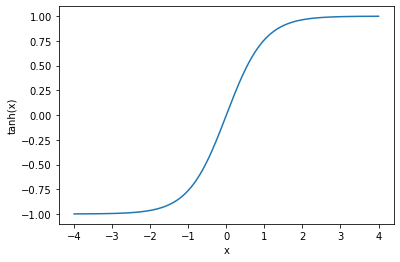

In [1]:
import numpy as np
import matplotlib.pylab as plt

# x = np.linspace(-np.pi, np.pi, 201)
x = np.linspace(-4, 4, 1000)
plt.plot(x, np.tanh(x))
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.axis('tight')
plt.show()

<p> 언뜻 보면 하이퍼볼릭 탄젠트 함수와 시그모이드 함수와 비슷하게 보인다. </p>

<p>
    RNN에는 가중치가 2개 있다. 하나는 입력 $\textbf{x}$를 출력 $\textbf{h}$로 변환하기 위한 $\textbf{W}_{\textbf{x}}$이고, 다른 하나는 1개의 RNN 출력을 다음 시각의 출력으로 변환하기 위한 가중치 $\textbf{W}_{\textbf{h}}$이다. 물론 변향 $\textbf{b}$도 있다. 각 가중치의 행렬 곱을 계산하고, 그 합을 tanh 함수 (하이퍼볼릭 탄젠트)를 이용해 반환한다. 결과로 시각 t의 출력 $\textbf{h}_t$가 출력된다. 이 출력은 다음 계층을 향해 출력되는 동시에 RNN 계층 자기 자신에게도 출력한다. 
</p>

<h3> 5.2.3 BPTT </h3>
<p>
    순환 구조를 펼친 후의 RNN은 오차역전파법을 적용할 수 있다. 먼저 순전파를 수행하고, 이어서 역전파를 수행하여 원하는 기울기를 구할 수 있다. 여기서 오차역전파법은 '시간 방향으로 펼친 신경망의 오차역전파법'이란 뜻으로 BRTT(Backpropagation Through Time)이라고 한다. 이 BRTT로 RNN을 학습할 수 있을 것 같지만 문제가 하나 있다. 긴 시계열 데이터를 학습할 때 시계열 데이터의 시간 크기가 커지는 것에 비례하여 BRTT가 소비하는 컴퓨팅 자원도 증가하기 때문이다. 그리고 시간 크기가 커지면 역전파 시의 기울기가 불안정해진다. 매 시각 RNN 계층의 중간 데이터 (hidden state vector)를 메모리에 유지해두어야 하기 때문이다. 
</p>

<h3> 5.2.4 Truncated BPTT </h3>

<p>
    큰 시계열 데이터를 취급할 때는 흔히 신경망 연결을 적당한 길이로 '끊는다'. 시간축 방향으로 너무 길어진 신경망을 적당한 지점에서 잘라내어 작은 신경망 여러 개로 만든다는 아이디어다. Truncated BPTT 에서는 신경망을 끊지만, 제대로 구현할려면 역전파의 연결만 끊어야 한다. 계층이 늘어서더라도 오차역전파법으로 기울기를 계산할 수 있다. 하지만 너무 길면 계산량과 메모리 사용량에 문제가 생기고, 계층이 길어지면 신경망을 하나 통과할 때마다 기울기 값이 조금씩 작아져서. 이전 시각 t까지 역전파되기 전에 0이 되어 소멸할 수 있다. 
</p>

<h3> 5.2.5 Truncated BPTT의 미니배치 학습 </h3>

<p>
    지금까지는 미니배치 수 1일 경우 해당한다. 미니배치 학습을 위해 데이터를 순서대로 입력해야 한다. 길이가 1000인 시계열 데이터에 대해서, 시각의 길이를 10개 단위로 잘라 Truncated BPTT로 학습하는 경우를 설명한다. 만약 미니배치 수를 두 개로 구성하여 학습한다면, 첫 미니배치는 처음부터 순서대로 데이터를 제공한다. 두번째 미니배치 때는 500번째의 데이터를 시작 위치로 정한다.
</p>

<h2> 5.3 RNN 구현 </h2>

<h3> 5.3.1 RNN 계층 구현 </h3>

<p>
    $$
        \textbf{h}_t = tanh(\textbf{h}_{t-1} \textbf{W}_{\textbf{h}} + \textbf{x}_t \textbf{W}_{\textbf{x}} + \textbf{x})
    $$
</p>

In [2]:
class RNN:
    def __init__(self, Wx, Wh, b):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.cache = None
        
    def forward(self, x, h_prev):
        Wx, Wh, b = self.params
        t = np.matmul(h_prev, Wh) + np.matmul(x, Wx) + b
        h_next = np.tanh(t)
        
        self.cache = (x, h_prev, h_next)
        return h_next
    
    def backward(self, dh_next):
        Wx, Wh, b = self.params
        x, h_prev, h_next = self.cache
        
        dt = dh_next * (1 - h_next ** 2)
        db = np.sum(dt, axis=0)
        dWh = np.matmul(h_prev.T, dt)
        dh_prev = np.matmul(dt, Wh.T)
        dWx = np.matmul(x.T, dt)
        dx = np.matmul(dt, Wx.T)
        
        self.grads[0][...] = dWx
        self.grads[1][...] = dWh
        self.grads[2][...] = db
        
        return dx, dh_prev

<h3> 5.3.2 Time RNN 계층 구현 </h3>

<p>
    Time RNN 계층은 T개의 RNN 계층으로 구성된다. Time RNN 계층은 RNN 계층 T개를 연결한 신경망이다. RNN 계층의 은닉 상태 \textbf{h}를 인스턴스 변수로 유지한다.
</p>

In [3]:
class TimeRNN:
    def __init__(self, Wx, Wh, b, stateful=False):
        self.params = [Wx, Wh, b]
        self.grads = [np.zeros_like(Wx), np.zeros_like(Wh), np.zeros_like(b)]
        self.layers = None
        
        self.h, self.dh = Npne, None
        self.stateful = stateful
        
    def set_state(self, h):
        self.h = h
        
    def reset_state(self):
        self.h = None
        
    def forward(self, xs):
        Wx, Wh, b = self.params
        N, T, D = xs.shape
        D, H = Wx.shape
        
        self.layers = []
        hs = np.empty((N, T, H), dtype='f')
        
        if not self.stateful or self.h is None:
            self.h = np.zeros((N, H), dtype='f')
            
        for t in range(T):
            layer = RNN(*self.params)
            self.h = layer.forward(xs[:, t, :], self.h)
            hs[:, t, :] = self.h
            self.layers.append(layer)
            
        return hs
    
    def backward(self, dhs):
        Wx, Wh, b = self.params
        N, T, H = dhs.shape
        D, H = Wx.shape
        
        dxs = np.empty((N, T, D), dtype='f')
        dh = 0
        grads = [0, 0, 0]
        for t in reversed(range(T)):
            layer = self.layers[t]
            dx, dh = layer.backward(dhs[:, t, :] + dh) 
            dxs[:, t, :] = dx
            
            for i, grad in enumerate(layer.grads):
                grads[i] += grad
                
        for i, grad in enumerate(grads):
            self.grads[i][...] = grad
        self.dh = dh
        
        return dxs    

<h2> 5.4 시계열 데이터 처리 계층 구현 </h2>

<p>
    RNN을 사용한 '언어 모델'을 구현한다. RNNLM이라고 한다.
</p>

<h3> 5.4.1 RNNLM의 전체 그림 </h3>

<p>
    첫 번째 층은 Embedding 계층이다. 이 계층은 단어 ID를 단어의 분산 표현(단어 벡터)으로 변환한다. 그리고 분산 표현이 다음 계층인 RNN 계층으로 입력된다. RNN 계층은 은닉 상태를 다음 층으로 출력하고 동시에, 다음 시각의 RNN 계층으로 출력한다. RNN 계층 위로 은닉 상태는 Affine 계층을 거쳐 Softmax 계층으로 전해진다. 
</p>

<h3> 5.4.2 Time 계층 구현 </h3>

<p>
    시계열 데이터를 한꺼번에 처리하는 계층을 Time RNN이라는 이름의 계층으로 구현했다. 시계열 데이터를 한꺼번에 처리하는 계층을 Time Embedding, Time Affine 형태의 이름으로 구현한다. 
</p>
<p>
    Softmax 계층을 구현할 때는 손실 오차를 구하는 Cross Entropy Error 계층도 함께 구현한다. Time Softmax with Loss 계층으로 구현한다. T개의 Softmax with Loss 계층 각각이 손실을 산출한다. 손실들을 합산해 평균한 값이 최종 손실이 된다.
    $$
        L = \frac{1}{T} ( L_0 + L_1 + \cdots + L_{T-1})
    $$
    Softmax with Loss 계층은 미니배치에 해당하는 손실의 평균을 구한다. 
</p>

<h2> 5.5 RNNLM 학습과 평가 </h2>

<h3> 5.5.1 RNNLM 구현 </h3>


In [1]:
import sys
sys.path.append('..')
import numpy as np
from common.time_layers import *

In [3]:
class SimpleRnnlm:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn
        
        # 가중치 초기화
        embed_W = (rn(V, D) / 100).astype('f')
        rnn_Wx = (rn(D, H) / np.sqrt(D)).astype('f')
        rnn_Wh = (rn(H, H) / np.sqrt(H)).astype('f')
        rnn_b = np.zeros(H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')
        
        # 계층 생성
        self.layers = [
            TimeEmbedding(embed_W),
            TimeRNN(rnn_Wx, rnn_Wh, rnn_b, stateful=True),
            TimeAffine(affine_W, affine_b)
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.rnn_layer = self.layers[1]
        
        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grad += layer.grads
    
    def forward(self, xs, ts):
        for layer in self.layers:
            xs = layer.forward(xs)
        loss = self.loss_layer.forward(xs, ts)
        return loss
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backwrad(dout)
        return dout
    
    def reset_state(self):
        self.rnn_layer.reset_state()
    
            

<h3> 5.5.2 언어 모델의 평가 </h3>

<p>
     언어 모델은 주어진 과거 단어로부터 다음에 출현한 단어의 확률분포를 출력한다. 언어 모델의 예측 성능을 평가하는 척도로 퍼플렉서티를 자주 이용한다. 퍼플렉서티는 간단히 말하면 '확률의 역수'이다. 퍼플렉서티는 작을수록 좋다는 것이다. 좋은 모델의 퍼플렉서티가 1.25라면 추측할 단어의 후보가 1개로 좁혀진다는 것이다. 나쁜 모델의 퍼플렉서티가 5라면 추측할 단어의 후보가 5개나 있다는 것이다. 입력 데이터가 여러 개일 때는 다음 공식에 따라 계산된다.
    $$
        L = - \frac{1}{N} \sum_{n}\sum_{k} t_{nk} log y_{nk} \\
        perplexity = e^L
    $$
</p>

<h3> 5.5.3 RNNLM의 학습 코드 </h3>

In [5]:
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import numpy as np
from common.optimizer import SGD
from dataset import ptb
from simple_rnnlm import SimpleRnnlm

# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100 # RNN의 은닉 상태 벡터의 원소 수
time_size = 5 # Truncated BPTT가 한 번에 펼치는 시간 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기 (전체 중 1000개만)
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)

xs = corpus[:-1] # 입력
ts = corpus[1:]  # 출력 (정답 레이블)
data_size = len(xs)
print('말뭉치 크기: %d, 어휘 수: %d' % (corpus_size, vocab_size))

# 학습 시 사용하는 변수
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []

# 모델 생성
model = SimpleRnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)

# 각 미니배치에서 샘플을 읽기 시작 위치를 계산
jump = (corpus_size - 1) // batch_size 
offsets = [i * jump for i in range(batch_size)]

for epoch in range(max_epoch):
    for iter in range(max_iters):
        # 미니배치 획득
        batch_x = np.empty((batch_size, time_size), dtype='i')
        batch_t = np.empty((batch_size, time_size), dtype='i')
        for t in range(time_size):
            for i, offset in enumerate(offsets):
                batch_x[i, t] = xs[(offset + time_idx) % data_size]
                batch_t[i, t] = ts[(offset + time_idx) % data_size]
            time_idx += 1
        
        # 기울기를 구하여 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        total_loss += loss
        loss_count = 1
        
    ppl = np.exp(total_loss / loss_count)
    print('| 에폭 %d | 퍼플렉서티 %.2f'
         % (epoch+1, ppl))
    ppl_list.append(float(ppl))
    total_loss, loss_count = 0, 0


말뭉치 크기: 1000, 어휘 수: 418
| 에폭 1 | 퍼플렉서티 18351320743406280232394167380846239073115136065536.00
| 에폭 2 | 퍼플렉서티 9256382108814505490736776727373004499125796864.00
| 에폭 3 | 퍼플렉서티 496942099130522721221771010804038176182632448.00
| 에폭 4 | 퍼플렉서티 203490042657186287535729253889065774609334272.00
| 에폭 5 | 퍼플렉서티 90149777448726279163994660835049369482821632.00
| 에폭 6 | 퍼플렉서티 65174552888102622032331861249780153273286656.00
| 에폭 7 | 퍼플렉서티 45369971780577645450430018772717214871060480.00
| 에폭 8 | 퍼플렉서티 38848406570141817446339414068893652027965440.00
| 에폭 9 | 퍼플렉서티 21848729405106457415613845913942513776852992.00
| 에폭 10 | 퍼플렉서티 26511859757883776668571950028592306630688768.00
| 에폭 11 | 퍼플렉서티 18002509723458987553960645086471163505278976.00
| 에폭 12 | 퍼플렉서티 25184751604661758800821516979302031498936320.00
| 에폭 13 | 퍼플렉서티 20978451595311525096338298732098381171130368.00
| 에폭 14 | 퍼플렉서티 21856185168964884199254398593037112426102784.00
| 에폭 15 | 퍼플렉서티 19086326255016436204081556563348129474150400.00
| 에폭 16 | 퍼플렉서티